In [0]:
# Importing the required libraries 
import pandas as pd
import random
import numpy as np


#Machine learning 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Visualization
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [0]:
# Importing and loading the required libraries
data  = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
#Converting the necessary categorical columns into continuous numerical
data["Customer data"]=data['Customer type'].map({'Member':1, 'Normal':0})
data.drop('Customer type', axis=1,inplace = True)


In [0]:
data["gender"]=data['Gender'].map({'Female':1, 'Male':0})
data.drop('Gender', axis=1,inplace = True)


In [0]:
data["city"]=data['City'].map({'Yangon':1, 'Naypyitaw':2, 'Mandalay':3})
data.drop('City', axis=1,inplace = True)


In [0]:
data["product_line"]=data['Product line'].map({'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6})
data.drop('Product line', axis=1,inplace = True)


In [0]:
data["branch"]=data['Branch'].map({'A':1, 'B':2, 'C':3})
data.drop('Branch', axis=1,inplace = True)


In [0]:
data["payment"]=data['Payment'].map({'Ewallet':1, 'Cash':2, 'Credit card':3})
data.drop('Payment', axis=1,inplace = True)
data.head()

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Customer data,gender,city,product_line,branch,payment
0,750-67-8428,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,1,1,1,6,1,1
1,226-31-3081,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,0,1,2,1,3,2
2,631-41-3108,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,0,0,1,4,1,3
3,123-19-1176,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,1,0,1,6,1,1
4,373-73-7910,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,0,0,1,3,1,1


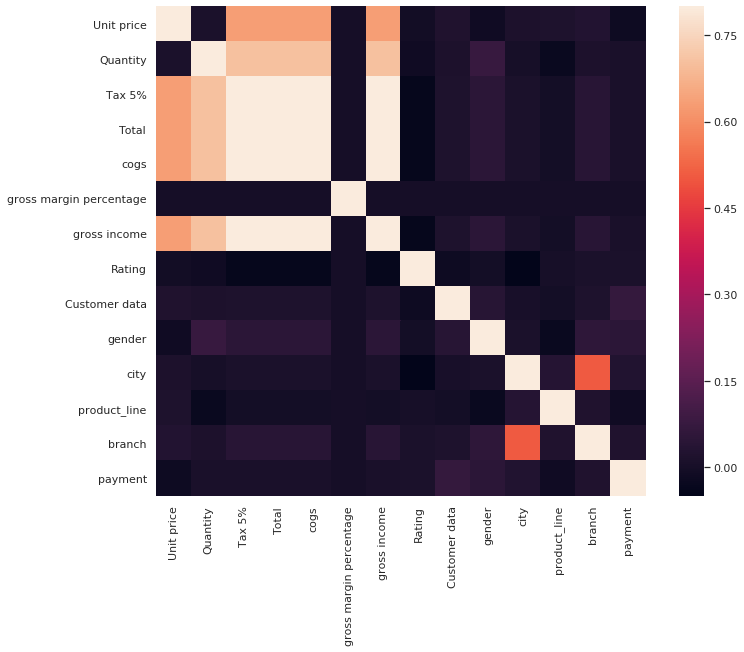

In [0]:
#Analysing the correlation between the columns using the correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
#Creating dataframe called data1 containg the quantityt and customer data columns
data1 = pd.DataFrame(data,columns=['Quantity','Customer data'])
data1.head()

,Quantity,Customer data
0,7,1
1,5,0
2,7,0
3,8,1
4,7,0


In [0]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['Quantity']
X = data1[feature_cols]
y = data1['Customer data']

logreg.fit(X,y)
pred = logreg.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'Customer type')

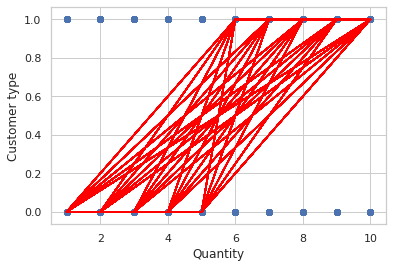

In [0]:
# Plot the class predictions.
plt.scatter(data1[feature_cols], data1['Customer data'])
plt.plot(data1[feature_cols], pred, color='red')
plt.xlabel('Quantity')
plt.ylabel('Customer type')

In [0]:
#Performing the logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = data1[['Quantity']]
y = data1['Customer data']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [0]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred)

0.492